# Opossum Complex
A synthetic data generator for causal impact and uplift analysis.

We are setting out to make a dataset that is big (2M), has a ton of features (200), a low response rate (3%), moderate lift effect from treatment.

In [1]:
from opossum import UserInterface
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

## Settings
150 features will be continuous
100 features will be categorical (40% binary, 30% 3 levels, 20% 5 levels, 10% 50 levels)

Assignment to exposure of advertisement (treatment) will be random at a probably of 85%

The intensity of the lift will be strong (8 on a scale of 10)

In [2]:
# number of observations N and number of covariates k
N = 2000000
k = 60

# initilizing class
u = UserInterface(N, k, seed=847, categorical_covariates = [20,[2,3,4,50,2,3,4,2,3,2]])

# assign treatment and generate treatment effect inside of class object
u.generate_treatment(random_assignment = True, 
                     assignment_prob = 0.75, 
                     treatment_option_weights = [.10,.033,0.80,0.033,0.034,.0], 
                     intensity = 10)

This will generate the needed output as four objects.
 - X contains the features
 - y contains the outcome
 - assignment represents if they were exposed to treatment
 - treatment represents the effect of treatment

In [3]:
# Creating continuous y with partial nonlinear relation 
    #X contains the features, y contains the outcome,
    #assignment represents if they were exposed to treatment
y, X, assignment, treatment = u.output_data(binary=False, x_y_relation = 'linear_simple')

In [4]:
sim_data_X = pd.DataFrame(X)
sim_data_y = pd.DataFrame(y)
sim_data_assign = pd.DataFrame(assignment)
sim_data_treat = pd.DataFrame(treatment)

In [5]:
sim_data_X = sim_data_X.rename(columns=lambda s: 'feature_'+str(s))
sim_data_y = sim_data_y.rename(columns={0:'response_cont'})
sim_data_assign = sim_data_assign.rename(columns={0:'exposed'})
sim_data_treat = sim_data_treat.rename(columns={0:'true_lift'})

In [6]:
x = 60
name_list = []
while x <= 119:
    y = 'feature_' + str(x)
    name_list.append(y)
    x = x + 1

sim_data_noise1 = pd.DataFrame(np.random.randint(0,2,size=(2000000, 60)), columns=name_list)

In [7]:
x = 120
name_list = []
while x <= 169:
    y = 'feature_' + str(x)
    name_list.append(y)
    x = x + 1

sim_data_noise2 = pd.DataFrame(np.random.randint(0,1000,size=(2000000, 50)), columns=name_list)

In [8]:
x = 170
name_list = []
while x <= 199:
    y = 'feature_' + str(x)
    name_list.append(y)
    x = x + 1

sim_data_noise3 = pd.DataFrame(np.random.uniform(0,100,size=(2000000, 30)), columns=name_list)

In [9]:
sim_data = pd.merge(sim_data_X, sim_data_noise1, left_index=True, right_index=True)
sim_data = pd.merge(sim_data, sim_data_noise2, left_index=True, right_index=True)
sim_data = pd.merge(sim_data, sim_data_noise3, left_index=True, right_index=True)
sim_data = pd.merge(sim_data, sim_data_y, left_index=True, right_index=True)
sim_data = pd.merge(sim_data, sim_data_assign, left_index=True, right_index=True)
sim_data = pd.merge(sim_data, sim_data_treat, left_index=True, right_index=True)
sim_data.sample(10)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,response_cont,exposed,true_lift
1252101,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,99.031408,19.481617,12.347562,37.022016,35.476516,55.912029,9.370150,4.059564,1,-2.000000
538089,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,...,12.114937,60.373333,46.071114,13.295516,49.619184,18.933123,2.591751,9.683722,1,1.922918
1212260,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.002752,3.408065,87.598130,90.918145,74.086657,17.128411,94.526841,8.736469,1,1.005651
1097785,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,...,6.393093,6.460996,41.818599,64.183148,49.234920,48.493922,80.042480,12.694787,1,1.523129
955259,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,1.0,...,50.110568,45.620246,2.725106,8.332759,92.108088,82.872671,41.803171,13.885372,1,0.070908
1001104,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,...,52.707512,90.272453,20.394392,13.741019,11.165889,64.889875,78.661454,8.858999,1,0.865856
1577387,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,...,66.071150,28.046372,94.053031,8.664970,47.155715,31.635677,29.909535,10.080252,1,2.110456
1287371,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,68.694137,42.042744,93.813785,46.758917,96.639800,26.935291,8.970892,11.153119,1,1.239112
1966757,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,...,94.795005,15.670992,16.706213,35.691272,98.996721,16.824705,32.751851,14.439111,1,2.000000
1984201,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,...,92.820072,11.005493,6.540104,62.888347,42.287016,46.368026,92.418362,7.627916,1,0.735001


In [10]:
sim_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Columns: 203 entries, feature_0 to true_lift
dtypes: float64(92), int64(111)
memory usage: 3.0 GB


## Binary Response

We will have a binary response built on the top 3 percentile of the response cont field

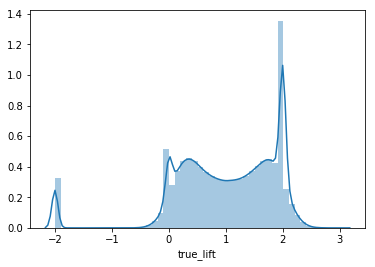

In [11]:
sns.distplot(sim_data[sim_data['exposed']==1]['true_lift']);

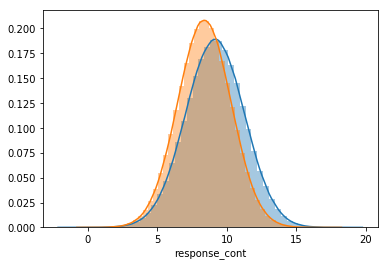

In [12]:
sns.distplot(sim_data['response_cont']);
sns.distplot(sim_data['response_cont']-sim_data['true_lift']);

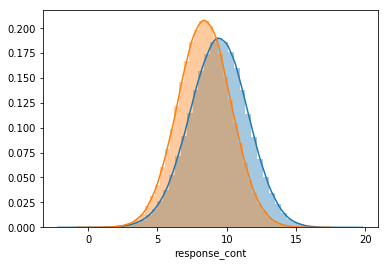

In [13]:
exposed_df = sim_data[sim_data['exposed']==1]
not_exposed_df = sim_data[sim_data['exposed']==0]
sns.distplot(exposed_df['response_cont']);
sns.distplot(not_exposed_df['response_cont']);

In [14]:
sim_data['response_cont_prior'] = sim_data['response_cont']-sim_data['true_lift']

In [15]:
sim_data['conversion'] = 0
sim_data['conversion_post'] = 0
sim_data.loc[sim_data['response_cont_prior'] < sim_data['response_cont_prior'].quantile(q=.97), 'conversion'] = 0
sim_data.loc[sim_data['response_cont_prior'] >= sim_data['response_cont_prior'].quantile(q=.97), 'conversion'] = 1
sim_data.loc[sim_data['response_cont'] < sim_data['response_cont_prior'].quantile(q=.97), 'conversion_post'] = 0
sim_data.loc[sim_data['response_cont'] >= sim_data['response_cont_prior'].quantile(q=.97), 'conversion_post'] = 1

In [16]:
def segments_f(row):
        if row['conversion_post'] == 1 and row['conversion'] == 0:
            return 'persuadable'
        elif row['conversion_post'] == 1 and row['conversion'] == 1:
            return 'sure_thing'
        elif row['conversion_post'] == 0 and row['conversion'] == 1:
            return 'sleeping_dog'
        elif row['conversion_post'] == 0 and row['conversion'] == 0:
            return 'lost_cause'

sim_data['segments'] = sim_data.apply(segments_f, axis=1)

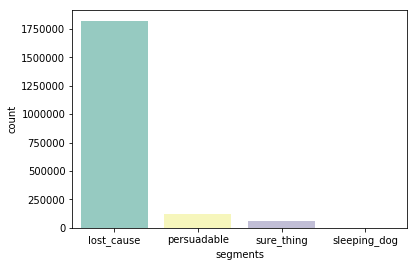

In [17]:
sns.countplot(x="segments", data=sim_data, palette='Set3');

In [18]:
sim_data['segments'].value_counts()

lost_cause      1820434
persuadable      119566
sure_thing        58386
sleeping_dog       1614
Name: segments, dtype: int64

In [19]:
#conversions with no marketing
print('conversions with no marketing: ', sim_data['conversion'].sum())
print('base propensity: {:.2f}'.format(sim_data['conversion'].sum()/len(sim_data['conversion'])))
print('conversions with marketing: ', sim_data['conversion_post'].sum())
#Persuadables
print('persuadables: ',sim_data[sim_data['segments']=='persuadable']['segments'].count())

print('pursuadable rate: {:.2f}'.format(sim_data[sim_data['segments']=='persuadable']['segments'].count()/len(sim_data['conversion'])))

conversions with no marketing:  60000
base propensity: 0.03
conversions with marketing:  177952
persuadables:  119566
pursuadable rate: 0.06


In [20]:
sim_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Columns: 207 entries, feature_0 to segments
dtypes: float64(93), int64(113), object(1)
memory usage: 3.1+ GB


In [21]:
sim_data.iloc[:,0:20] = sim_data.iloc[:,0:20].astype('category')
sim_data.iloc[:,60:120] = sim_data.iloc[:,60:120].astype('category')
sim_data['exposed'] = sim_data['exposed'].astype('category')
sim_data['conversion'] = sim_data['conversion'].astype('category')
sim_data['conversion_post'] = sim_data['conversion_post'].astype('category')

In [22]:
sim_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Columns: 207 entries, feature_0 to segments
dtypes: category(83), float64(73), int64(50), object(1)
memory usage: 2.0+ GB


In [23]:
##Commenting out to prevent override of dataset
filepath = ('/nas/isg_prodops_work/stemr/2020/2020_03 - Capstone Project/')
sim_data.to_pickle(filepath + 'opossum_sim_complex.pkl')

In [24]:
sim_data_sample = sim_data.sample(100)
sim_data_sample.to_csv(filepath + 'opossum_sim_complex_samp.csv', index=False)